In [24]:
#Import Libraries
import json
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [25]:
# Read JSON file
with open('new_bus_json.json') as f:
    data = json.load(f)

# Extract relevant data by Converting JSON data to DataFrame
system_data = []
for key, value in data['sensorData']['jsonData'].items():
    value['id'] = key  # Add an identifier for each data point
    system_data.append(value)

# Convert to pandas DataFrame
df = pd.DataFrame(system_data)
df

,count,humidity,pressure,temperature,id,oxygenSensor
0,0,45.48,99.09,23.68,-NlJJWAq0weZ-2Ma2s2I,NaN
1,0,45.99,99.09,23.78,-NlJJWpxBWvtf89oy_8j,NaN
2,0,46.34,99.09,23.74,-NlJJXU-HIxTWY9fY1yU,NaN
3,0,46.19,99.09,23.74,-NlJJY7N0Hqj-mAfZhuW,NaN
4,0,46.47,99.09,23.78,-NlJJYlN7-idCOC5_nNI,NaN
...,...,...,...,...,...,...
7043,5,40.85,99.60,23.71,-Nv0Q-pNPJzMrIadKZRk,20.74
7044,5,41.07,99.60,23.71,-Nv0Q0lnZwZPIqzpPIFF,20.73
7045,5,40.92,99.60,23.71,-Nv0Q1iIDUka3IzUUCQj,20.74
7046,5,41.16,99.60,23.71,-Nv0Q2etjcgE3ZR6QQ_q,20.73


In [3]:
print(df.describe())

             count     humidity     pressure  temperature  oxygenSensor
count  7048.000000  7048.000000  7048.000000  7048.000000   4084.000000
mean     17.159620    40.485480    98.336019    23.700681     20.819167
std      29.646112     5.780863     5.892388     1.862144      0.101321
min       0.000000     0.000000     0.000000     0.000000     20.620000
25%       2.000000    39.580000    98.280000    22.710000     20.760000
50%       4.000000    40.840000    98.490000    23.410000     20.790000
75%       9.000000    43.960000    99.060000    25.110000     20.840000
max      91.000000   134.570000    99.820000    26.860000     21.270000


In [9]:
print("Missing values:", df.isnull().sum())

Missing values: count                      0
humidity                   0
pressure                   0
temperature                0
id                         0
oxygenSensor            2964
temperature_category       0
dtype: int64


NameError: name 'df' is not defined

In [27]:
# Handle missing values
df.dropna(inplace=True)

In [28]:
null_value = df.isnull()
null_count = null_value.sum()
null_count

count           0
humidity        0
pressure        0
temperature     0
id              0
oxygenSensor    0
dtype: int64

In [29]:
# Check for missing values
print("Missing values:", df.isnull().sum())

Missing values: count           0
humidity        0
pressure        0
temperature     0
id              0
oxygenSensor    0
dtype: int64


In [30]:
# Model Selection
# Discretize temperature into categories (e.g., low, medium, high)
def discretize_temperature(temp):
    if temp < 20:
        return 'low'
    elif temp >= 20 and temp <= 25:
        return 'medium'
    else:
        return 'high'

df['temperature_category'] = df['temperature'].apply(discretize_temperature)

In [31]:
df.head()

,count,humidity,pressure,temperature,id,oxygenSensor,temperature_category
2964,4,41.97,98.14,22.07,-NueoL1gkM2PqLlSs80d,20.72,medium
2965,4,41.36,98.14,22.20,-NueoM0DI7IgmpG9immZ,20.70,medium
2966,4,41.41,98.14,22.18,-NueoN0FbRmlmFW0JL_V,20.75,medium
2967,4,41.28,98.15,22.22,-NueoNxjgSLPRouUY6fp,20.74,medium
2968,4,41.19,98.14,22.18,-NueoOu2aHQkjTgyOZz9,20.74,medium


In [32]:
# Split data into features (X) and target variable (y)
X = df[['humidity', 'pressure', 'count', 'oxygenSensor']]  # Feature matrix
y = df['temperature_category']  # Target variable

In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Train the Model Using Training Data
# Initialize and fit the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
# Performance Evaluation Using Test Data
# Predict on the test set
y_pred = model.predict(X_test)
print(y_pred)

['medium' 'medium' 'medium' 'medium' 'medium' 'high' 'medium' 'medium'
 'medium' 'medium' 'high' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'high' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'high' 'medium' 'medium'
 'high' 'high' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'high'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'high' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'high' 'medium' 'medium' 'medium' 'high' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium

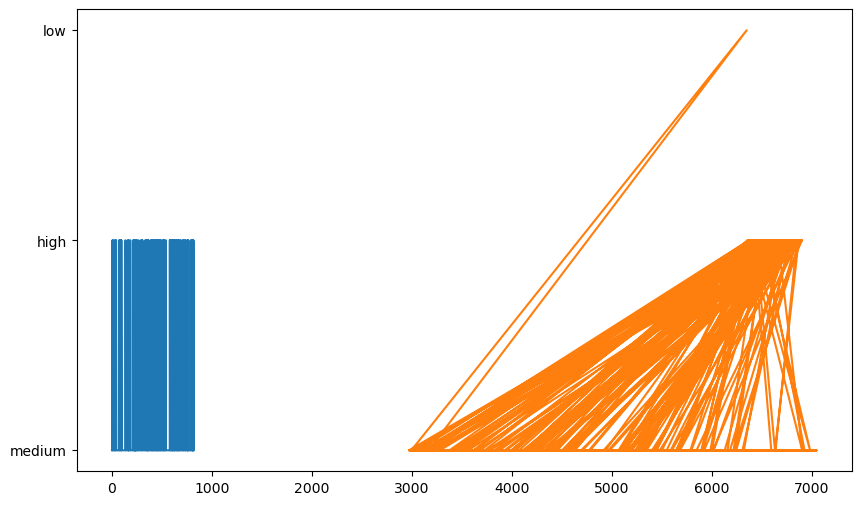

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred)
plt.plot(y_test)

In [57]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.988984088127295


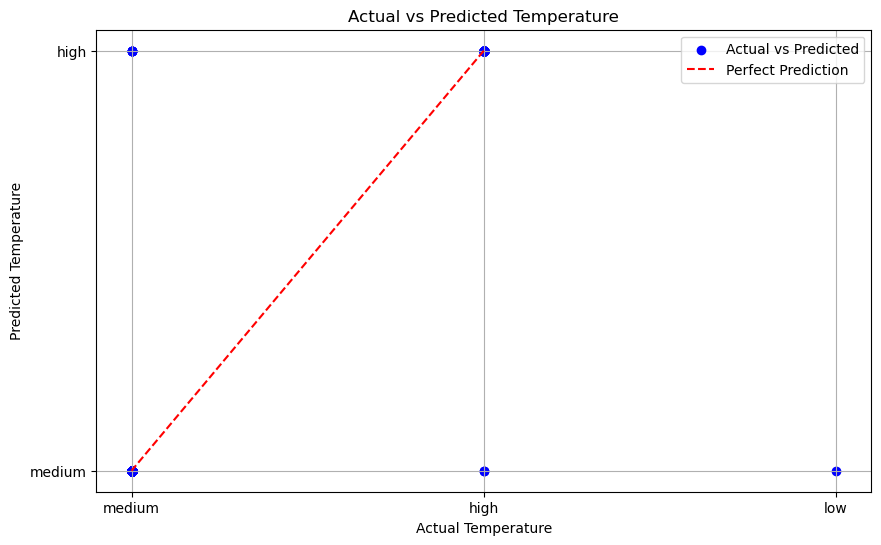

In [47]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()
